In [ ]:
# import libraries

import pandas as pd 
import numpy as np
!pip install missingno
import missingno as msno
!pip install plotly
import plotly.express as px
from scipy.stats import skew, norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
!pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Q1

at the begining i merged the first two datasets(historical_transactions and new_merchant_transactions) with a traditional way because they have the same features and assign the new data frame on merged_df1
after that i checked the common features between the merged_df1 and the merchants data, it was found that there were 7 common features between them. therfore i performed inner join and assigned the dataframe on merged_df2
finally i checked the common features between the merged_df2 and userscore and it was found only one common feature between them. therefore i performed inner join and assigned the dataframe on df

In [ ]:
# load the 4 data files
df1 = pd.read_csv('historical_transactions.csv')  # load historical_transactions file
df2 = pd.read_csv('new_merchant_transactions.csv')  # load new_merchant_transactions file
df3 = pd.read_csv('merchants.csv')  # load merchants file
df4 = pd.read_csv('userscore.csv')  # load userscore file

# print the dimension for each data frame 
df1.shape
df2.shape
df3.shape
df4.shape

# print the first five rows for each data frame
df1.head()
df2.head()
df3.head()
df4.head()

(29112361, 14)

(1963031, 14)

(334696, 22)

(201917, 6)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


In [ ]:
# Concatenate the two dataframes (historical_transactions and new_merchant_transactions) vertically because the have the same features 
merged_df1 = pd.concat([df1, df2])

# Reset the index of the merged dataframe
merged_df1 = merged_df1.reset_index(drop=True)

# check the dimension after merged the two datasets
merged_df1.shape

# print the first five rows after merging to check the columns name 
merged_df1.head()

(31075392, 14)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
# Find the common columns between the two dataframes (merged_df1 and merchants)
common_cols = list(set(merged_df1.columns).intersection(df3.columns))

# Print the common columns
print(common_cols)

# Perform an inner join on the two dataframes (merged_df1 and merchants)
merged_df2 = pd.merge(merged_df1, df3, on= common_cols)

# print the shape after performing inner join
merged_df2.shape

# print the first five rows after performing the inner join
merged_df2.head()

['category_1', 'merchant_category_id', 'subsector_id', 'state_id', 'merchant_id', 'category_2', 'city_id']


(20289044, 29)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.741649,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.745405,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.737892,...,1.08,1.082451,3,1.14,1.114135,6,1.19,1.156844,12,Y


In [ ]:
# Find the common columns between the two dataframes (merged_df2 and userscore)
common_cols = list(set(merged_df2.columns).intersection(df4.columns))

# Print the common columns
print(common_cols)

# Perform an inner join on the two dataframes (merged_df2 and userscore)
df = pd.merge(merged_df2, df4, on= common_cols)

# print the shape after performing inner join
df.shape

# print the first five rows after performing the inner join
df.head()

['card_id']


(12563652, 34)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,Y,C_ID_d244d8976d,88,N,0,A,80,M_ID_e020e9b302,-4,-0.713098,...,6,1.19,1.156844,12,Y,Aug-17,3,2,1,-0.168948
1,Y,C_ID_d244d8976d,69,N,0,A,278,M_ID_f86439cec0,0,-0.699694,...,6,1.13,1.125829,12,Y,Aug-17,3,2,1,-0.168948
2,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,-5,-0.684488,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948
3,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,0,-0.665855,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948
4,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,-5,-0.695893,...,6,1.00,1.024796,12,Y,Aug-17,3,2,1,-0.168948


# Q2

according to the below statistics and graphs:

1- the number of missing values are five (category_3, category_2, avg_sales_lag3, avg_sales_lag6, avg_sales_lag12)

2- the pattern of missing values is general pattern 

3- the mechanism of the (avg_sales_lag3, avg_sales_lag6, avg_sales_lag12) is missing at random (MAR) because they have a relation in the missing value when one has null value the others have null value in the same record, while category_3, category_2 their mechanism are missing compeletly at random (MCAR).

In [ ]:
# print some information about the data to check the datatype for each colmns
df.info()

# illustrate some statistics about the data
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563652 entries, 0 to 12563651
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id                      int64  
 3   category_1                   object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id         int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2                   float64
 12  state_id                     int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
count,12563652,12563652,1.256365e+07,12563652,1.256365e+07,12476244,1.256365e+07,12563652,1.256365e+07,1.256365e+07,...,1.256365e+07,1.255785e+07,1.256365e+07,1.256365e+07,12563652,12563652,1.256365e+07,1.256365e+07,1.256365e+07,1.256365e+07
unique,2,193619,NaN,2,NaN,3,NaN,207449,NaN,NaN,...,NaN,NaN,NaN,NaN,2,75,NaN,NaN,NaN,NaN
top,Y,C_ID_0cd2ce025c,NaN,N,NaN,A,NaN,M_ID_e5374dabc0,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,Jan-17,NaN,NaN,NaN,NaN
freq,11577679,2548,NaN,11565790,NaN,6529318,NaN,267515,NaN,NaN,...,NaN,NaN,NaN,NaN,7251100,805024,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.225711e+02,NaN,6.402080e-01,NaN,4.614522e+02,NaN,-4.137216e+00,2.456488e-01,...,5.996990e+00,6.726357e+01,inf,1.193341e+01,NaN,NaN,3.099102e+00,1.733425e+00,5.406364e-01,-4.649742e-01
std,NaN,NaN,9.600395e+01,NaN,2.518455e+00,NaN,2.409172e+02,NaN,3.772919e+00,1.701168e+03,...,9.525070e-02,7.522398e+03,NaN,5.272832e-01,NaN,NaN,1.267184e+00,7.138124e-01,4.983460e-01,3.605745e+00
min,NaN,NaN,-1.000000e+00,NaN,-1.000000e+00,NaN,2.000000e+00,NaN,-1.300000e+01,-7.469078e-01,...,1.000000e+00,-2.320000e+00,9.832954e-02,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,-3.321928e+01
25%,NaN,NaN,5.300000e+01,NaN,0.000000e+00,NaN,2.780000e+02,NaN,-7.000000e+00,-7.213627e-01,...,6.000000e+00,9.500000e-01,9.716296e-01,1.200000e+01,NaN,NaN,2.000000e+00,1.000000e+00,0.000000e+00,-8.066553e-01
50%,NaN,NaN,8.800000e+01,NaN,0.000000e+00,NaN,4.370000e+02,NaN,-3.000000e+00,-6.903480e-01,...,6.000000e+00,1.040000e+00,1.052381e+00,1.200000e+01,NaN,NaN,3.000000e+00,2.000000e+00,1.000000e+00,-9.086313e-02
75%,NaN,NaN,1.890000e+02,NaN,1.000000e+00,NaN,7.050000e+02,NaN,-1.000000e+00,-6.089644e-01,...,6.000000e+00,1.160000e+00,1.154022e+00,1.200000e+01,NaN,NaN,4.000000e+00,2.000000e+00,1.000000e+00,5.339889e-01


In [ ]:
# number of columns that contains null values 
sum(df.isna().any())

# display number of nulls in each column
df.isna().sum()/ len(df['card_id'])

5

authorized_flag                0.000000
card_id                        0.000000
city_id                        0.000000
category_1                     0.000000
installments                   0.000000
category_3                     0.006957
merchant_category_id           0.000000
merchant_id                    0.000000
month_lag                      0.000000
purchase_amount                0.000000
purchase_date                  0.000000
category_2                     0.094461
state_id                       0.000000
subsector_id                   0.000000
merchant_group_id              0.000000
numerical_1                    0.000000
numerical_2                    0.000000
most_recent_sales_range        0.000000
most_recent_purchases_range    0.000000
avg_sales_lag3                 0.000462
avg_purchases_lag3             0.000000
active_months_lag3             0.000000
avg_sales_lag6                 0.000462
avg_purchases_lag6             0.000000
active_months_lag6             0.000000


<Axes: >

<Axes: >

<Axes: >

<Axes: >

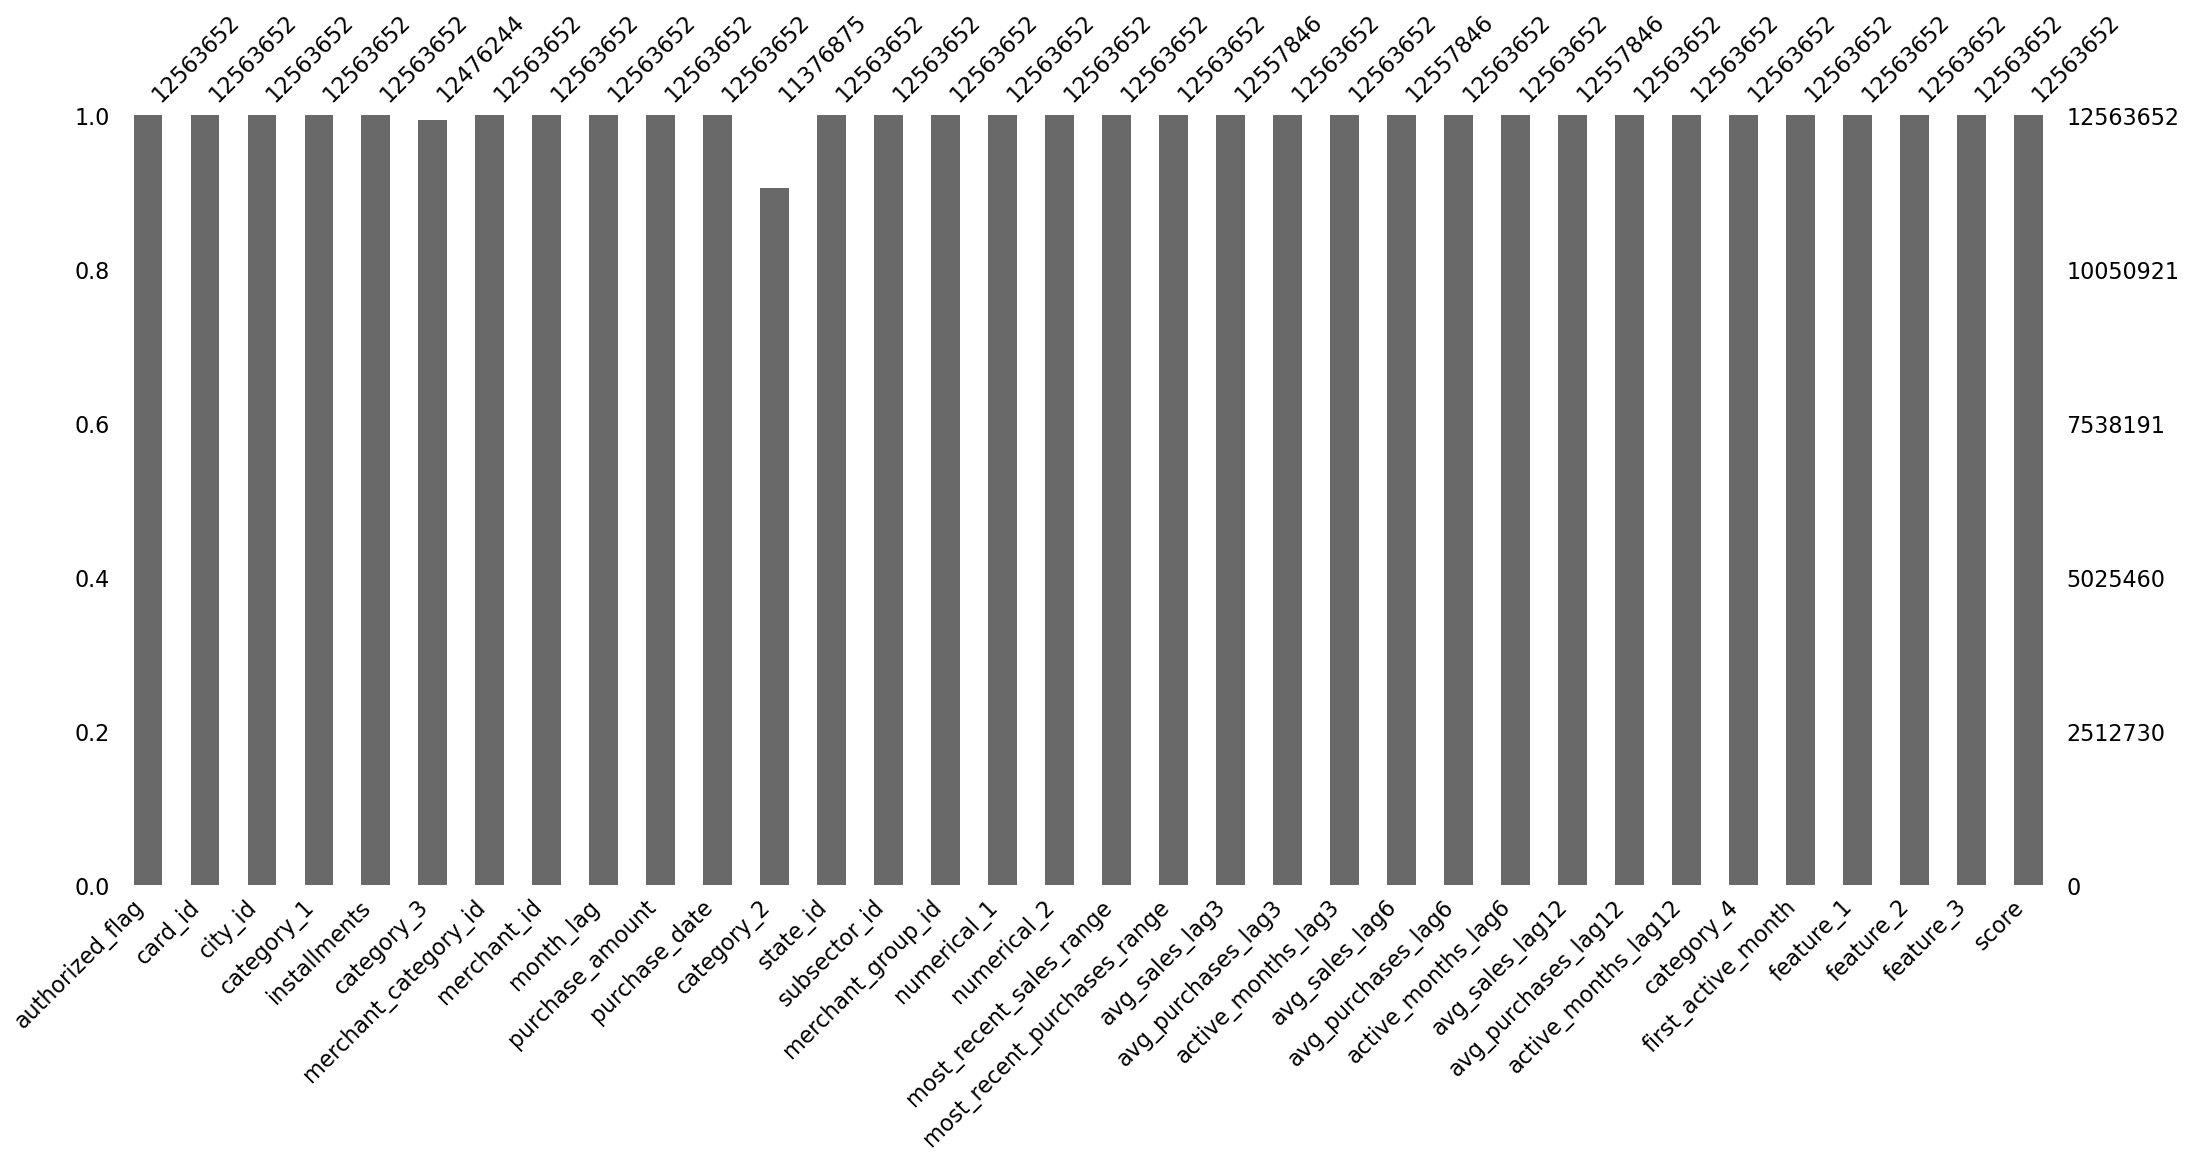

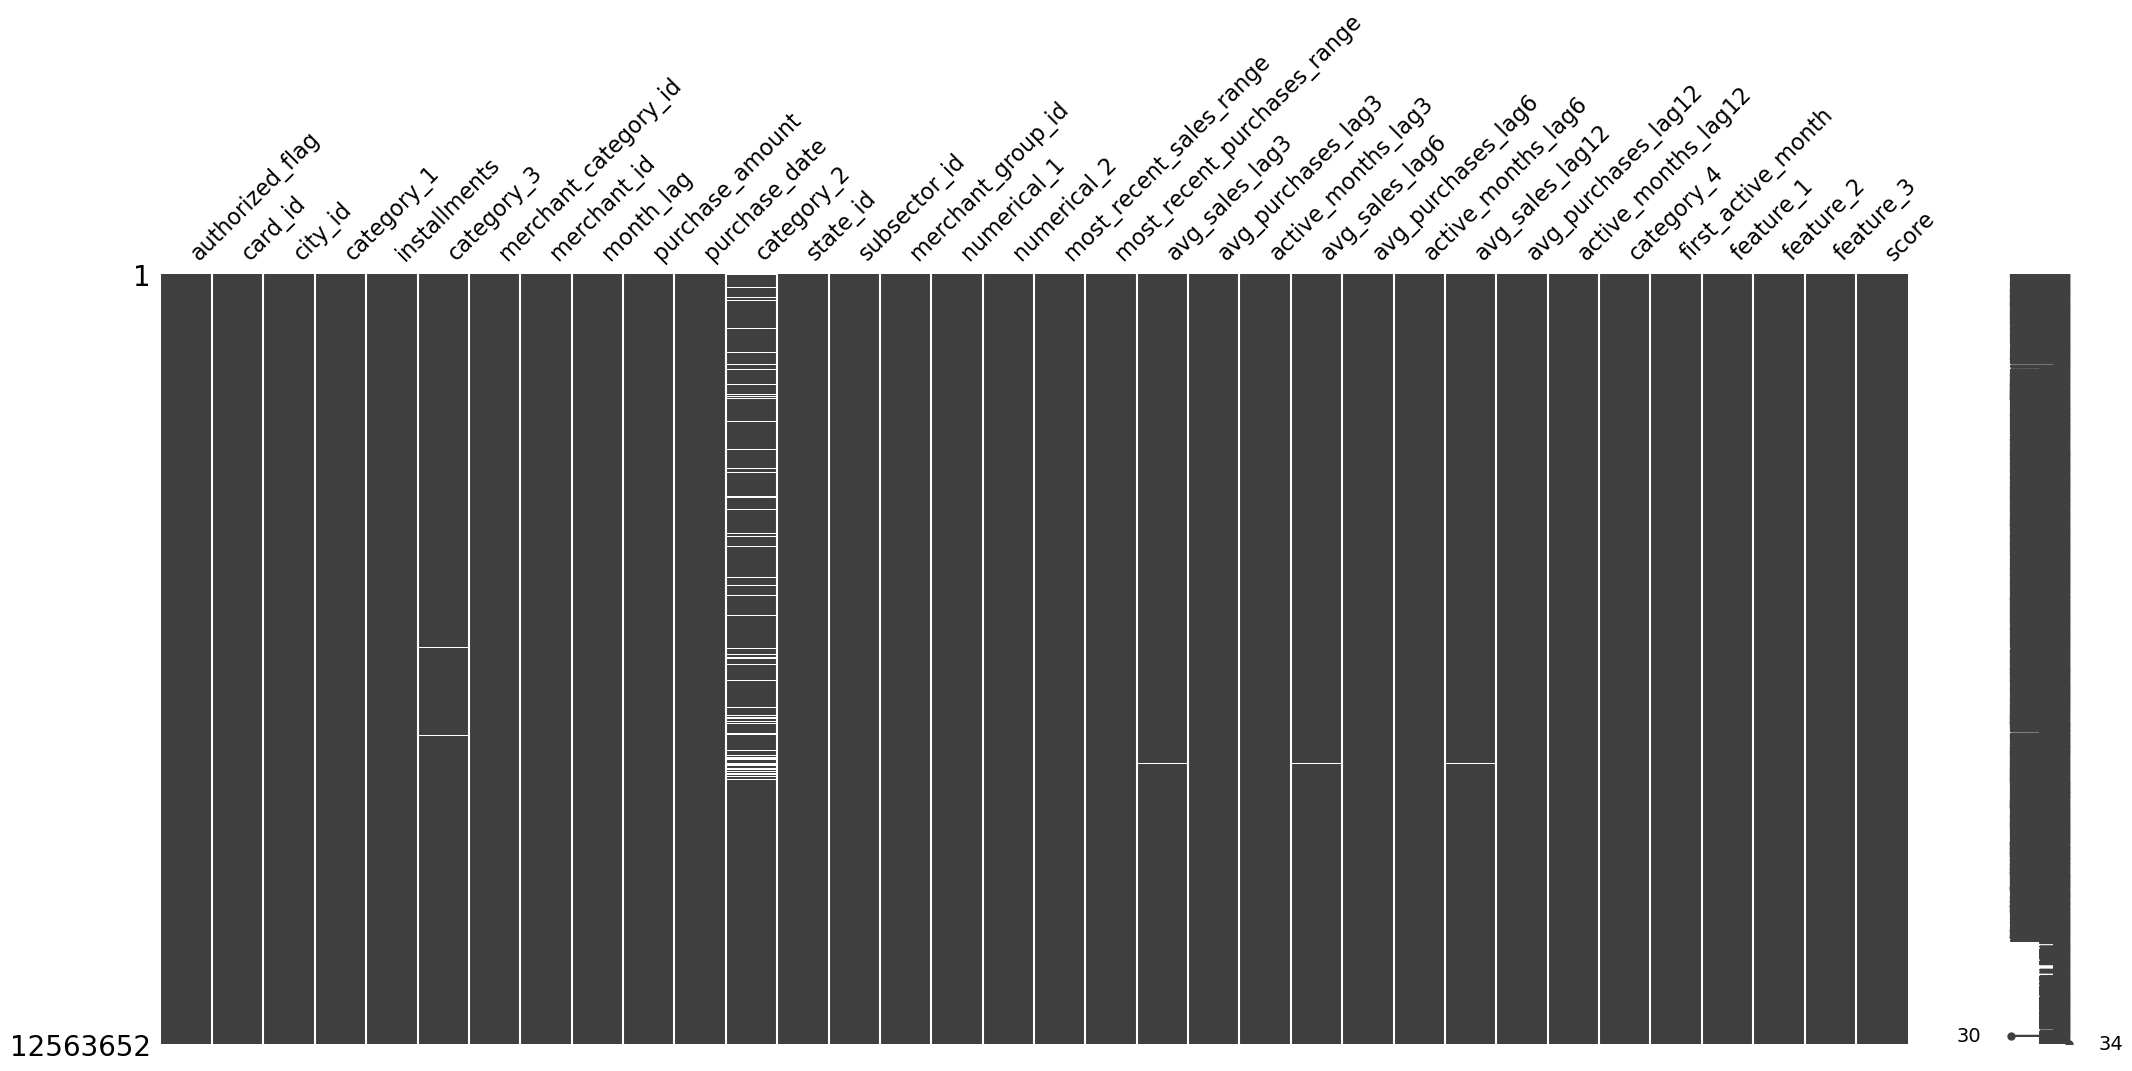

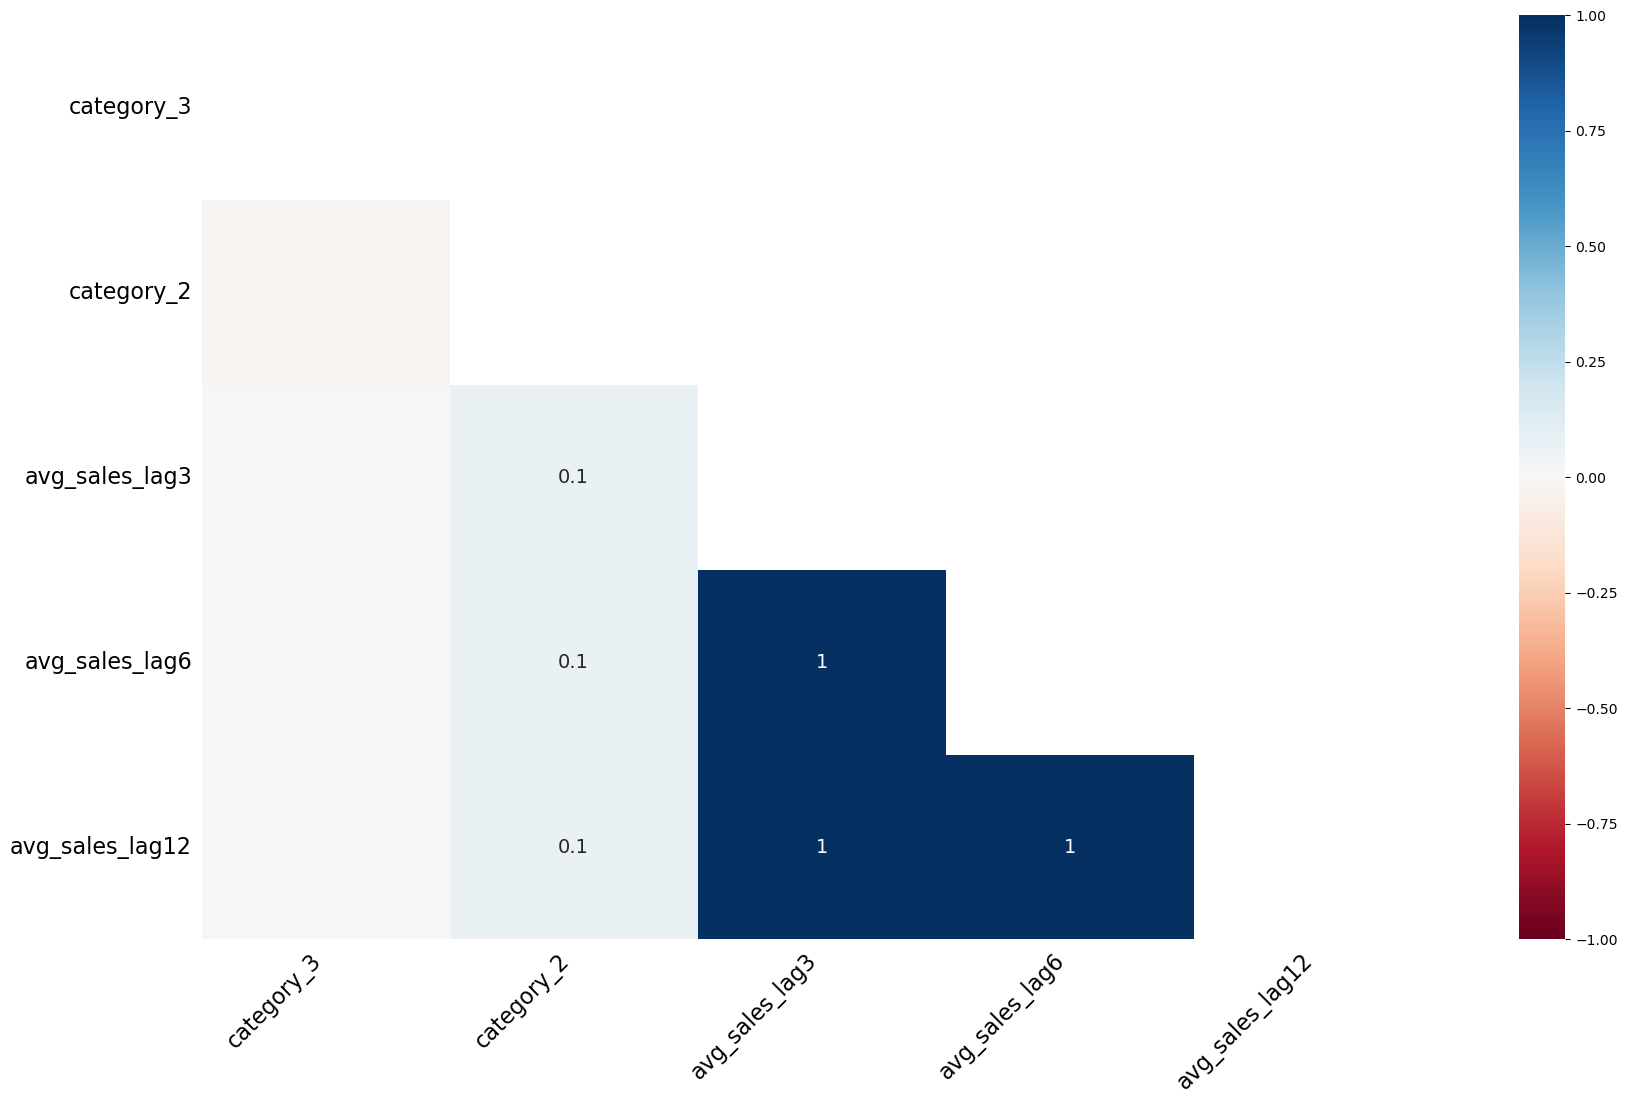

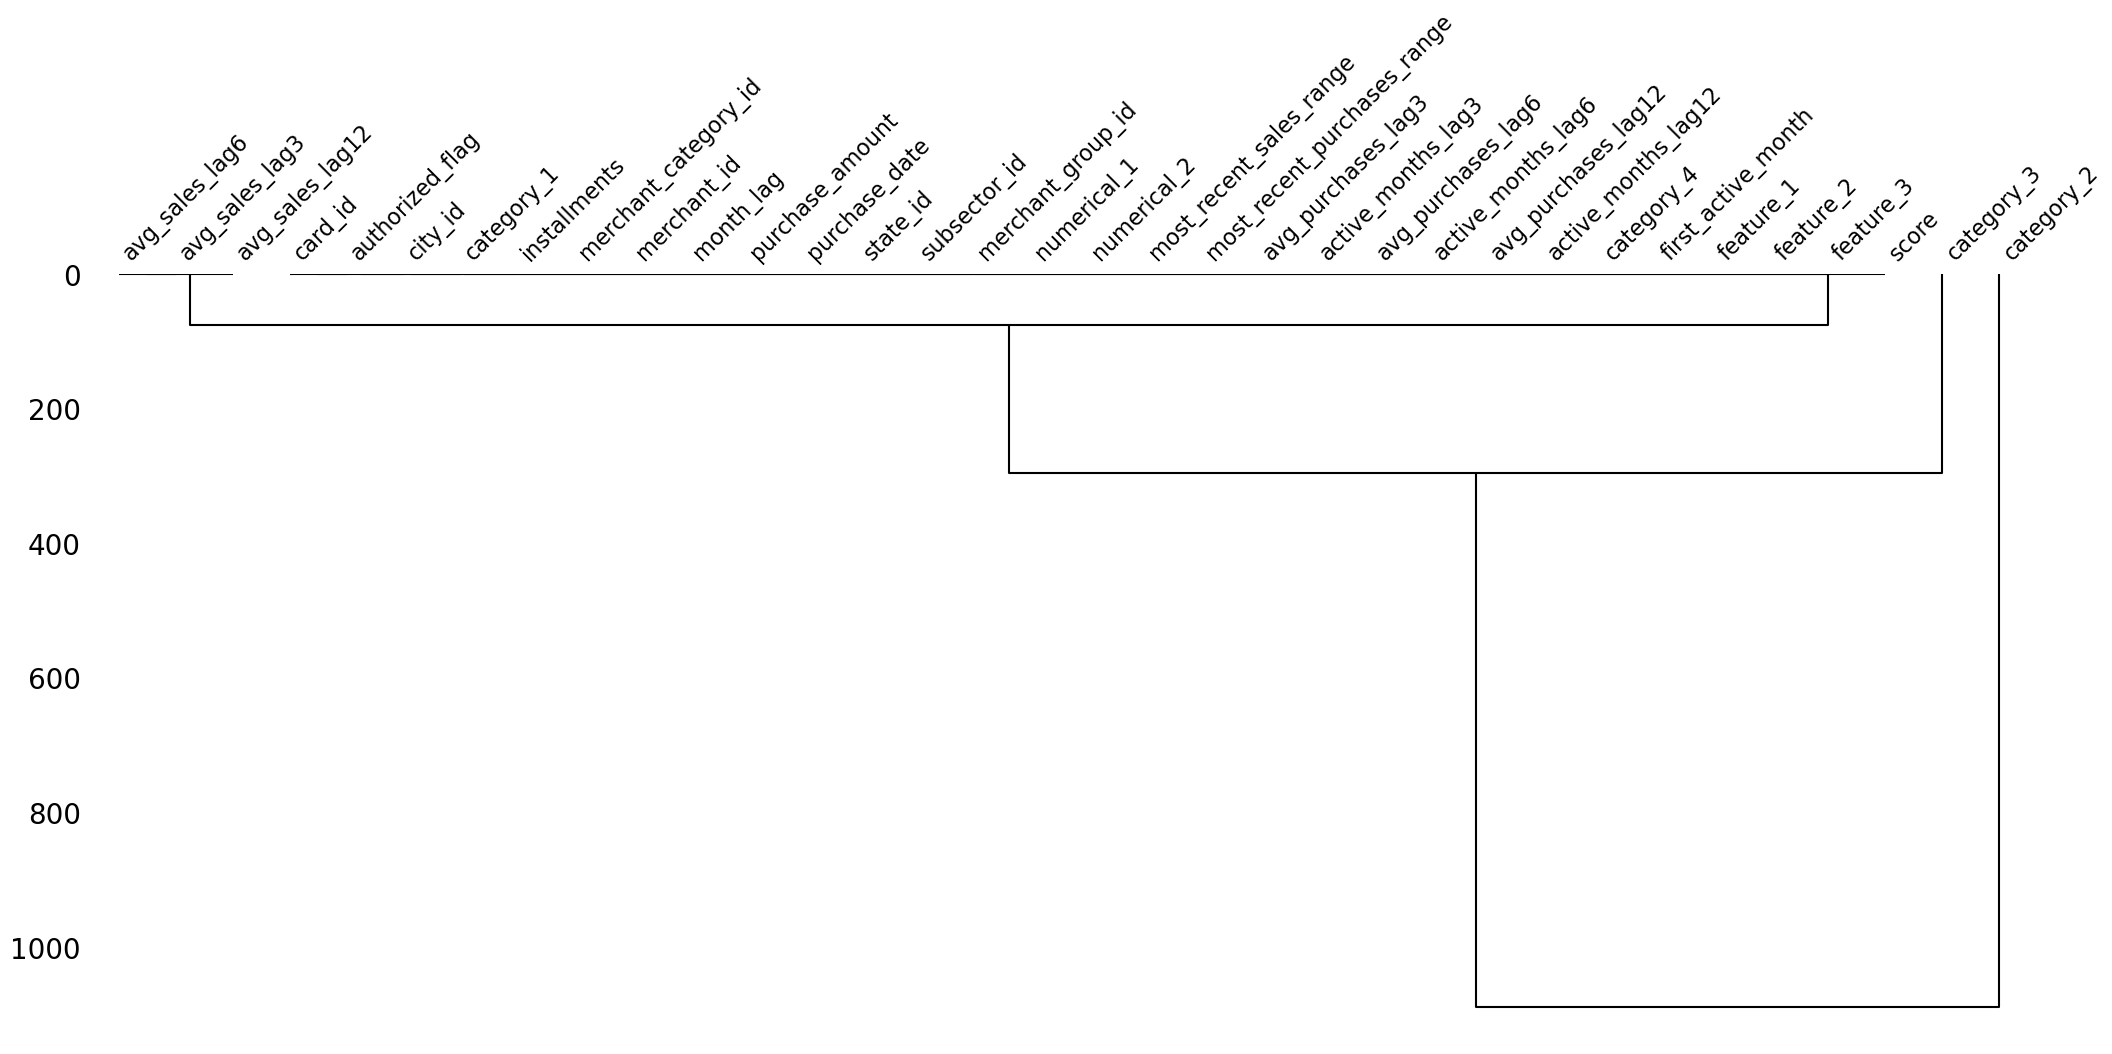

In [ ]:
# Plot bar chart for columns to illustrate the null values 
msno.bar(df)

# plot null values as a matrix
msno.matrix(df)

# plot heat map for the columns to observe the relation between null values
msno.heatmap(df)

# print dendogram for the missing value
msno.dendrogram(df)

# Q3

considering the data clean and feature selection: I dropped all IDs columns because it will not be useful for the model, in addition the category_1 column has only one unique value therefore it was dripped considering the multicollinearity which appears in the above heat map the features which have strong relation between other features were dropped. such as : numerical_2, avg_purchases_lag3, avg_purchases_lag12, avg_sales_lag12

considering the missing values: all the records which contain missing missing values were dropped because we have more than 12 million records and after dropping we have more than 11 million record

In [ ]:
# print the number of unique values in each column to help in feature selection
for col in df.columns:
    num_unique = df[col].nunique()
    print(f"Column {col} has   {num_unique}   unique values.")

Column authorized_flag has   2   unique values.
Column card_id has   193619   unique values.
Column city_id has   271   unique values.
Column category_1 has   2   unique values.
Column installments has   15   unique values.
Column category_3 has   3   unique values.
Column merchant_category_id has   313   unique values.
Column merchant_id has   207449   unique values.
Column month_lag has   16   unique values.
Column purchase_amount has   155811   unique values.
Column purchase_date has   9582461   unique values.
Column category_2 has   5   unique values.
Column state_id has   24   unique values.
Column subsector_id has   40   unique values.
Column merchant_group_id has   80097   unique values.
Column numerical_1 has   677   unique values.
Column numerical_2 has   675   unique values.
Column most_recent_sales_range has   5   unique values.
Column most_recent_purchases_range has   5   unique values.
Column avg_sales_lag3 has   2431   unique values.
Column avg_purchases_lag3 has   79167 

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

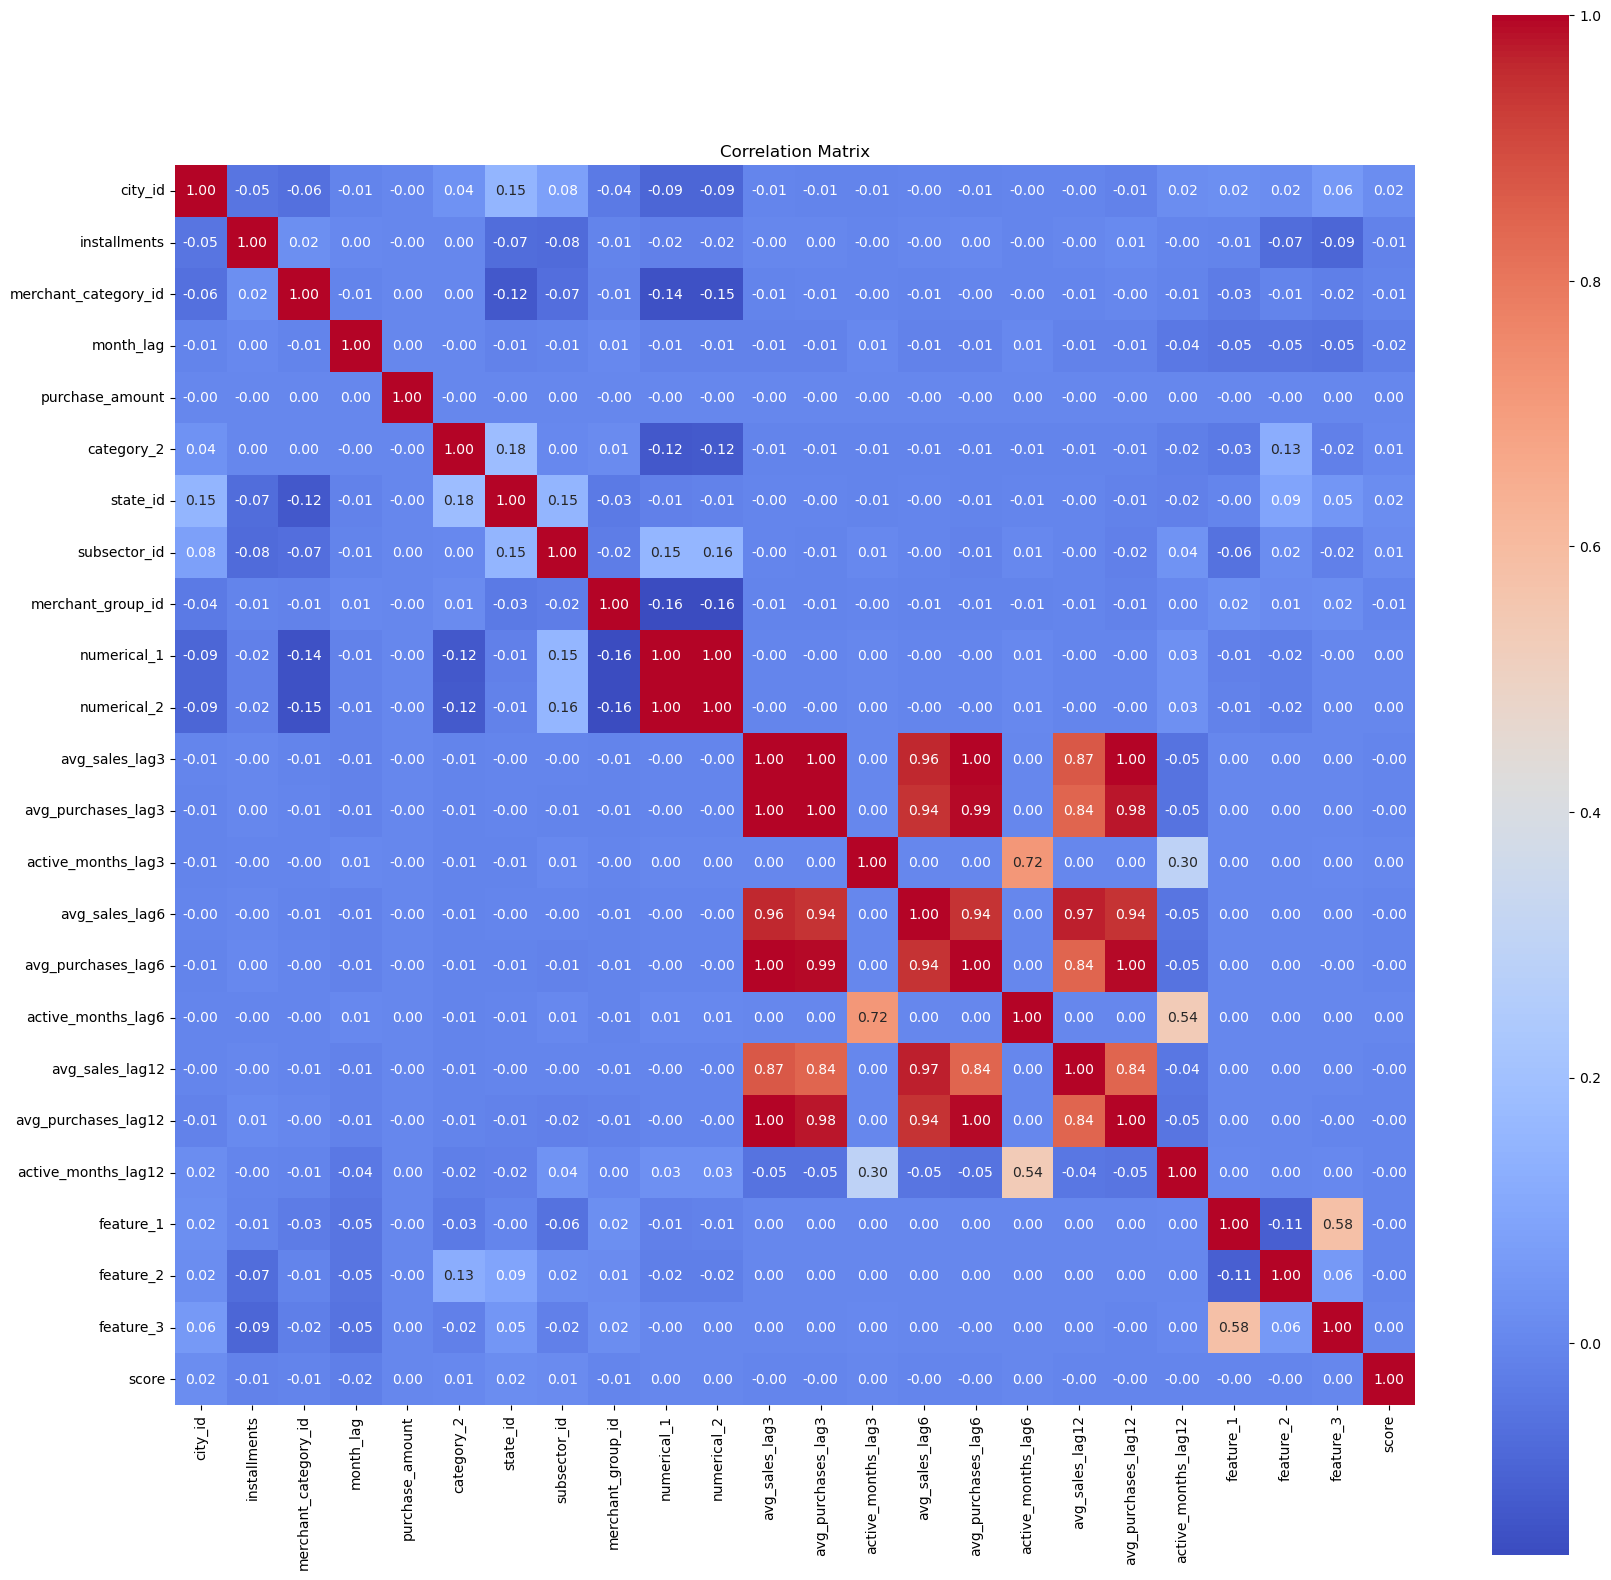

In [ ]:
# select the numeric features 
numeric_data = df.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# drop all missing values 
df = df.dropna()

# drop unwanted columns 
df = df.drop(['card_id','city_id','merchant_category_id','merchant_id','state_id','subsector_id','merchant_group_id', 'category_1','numerical_2',
              'avg_purchases_lag6','avg_sales_lag6','avg_purchases_lag3', 'avg_purchases_lag12', 'avg_sales_lag12'],axis=1)

In [ ]:
# check the shape of the data frame ater dropping the columns 
df.shape

(11292220, 20)

# Q4

considering the important statistics i performed graphical tests and statical tests to check the normality of score feature 

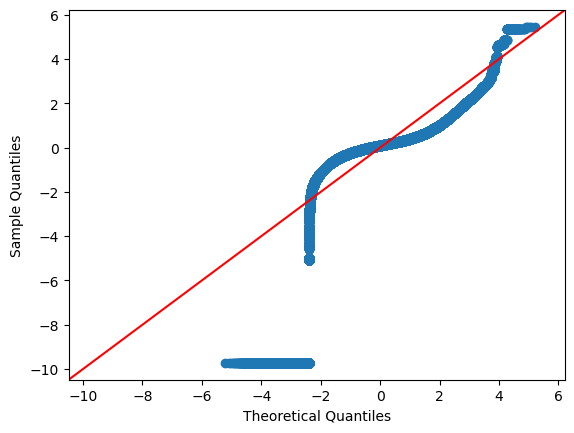

/tmp/ipykernel_3091/2965800640.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X, fit=norm, ax=axes[0])


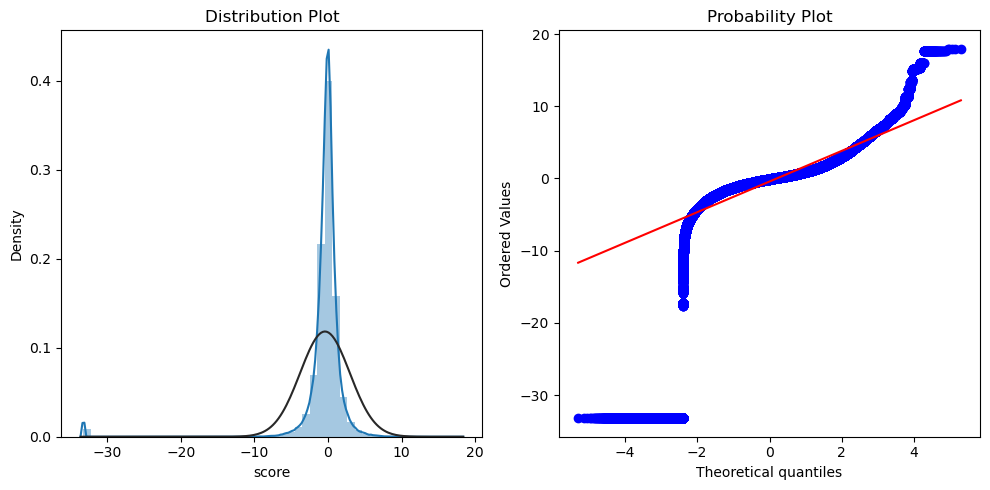

In [ ]:
# start with graphical methods

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['score'], line='45', fit = True)
plt.show()

def normality_plot(X):

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Draw distribution plot with normal distribution fitted curve
    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    # Draw Quantile-Quantile plot 
    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(df['score'])

In [ ]:
# let's try the statical tests

# Shapiro-wilk test
#p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
w, pvalue = stats.shapiro(df['score']) 
print("p = {:g}".format(pvalue))

# D’Agostino-Pearson’s K² test
k2, p = stats.normaltest(df['score'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p = 0
p = 0
The null hypothesis can be rejected


according to the graphical tests and statical tests the target column is not normaliy distributed:

in the grphical tests Q-Qplot and probability plot appear that the does not fit the line and distribution plot appears that the data does not have the normal distribution shape

in the statical tests the null value which consider the data comes from normal distribution was rejected.

Shapiro and D’Agostino are a parametric test assume that the data comes from normal distributio null hypothesis (H0): "SALE PRICE" comes from a normal distribution alterantive hypothesis (H1): "SALE PRICE" does not come from normal distribution

# Q5 design two hypothesis tests

steps for hypothesis testing:

1- State the null hypothesis (H0) and alternative hypothesis (H1).

2- Choose the level of significance (alpha).

3- Select an appropriate test statistic.

4- Calculate the test statistic.

5- Determine the p-value.

6- Compare the p-value to the level of significance.

7- Interpret the results.

**first hypothesis:**

does the loyality score change when the transaction was authorized 
H0: the loyality score doesnot change 
H1: the loyality score chanes 

In [ ]:
df['authorized_flag'].unique()

# authorized ==> Y
# not_autherized ==> N

array(['Y', 'N'], dtype=object)

In [ ]:
# specify loyalty score for authorized and not authorized flag 
authorized = df.loc[df['authorized_flag'] == 'Y']['score']
not_autherized = df.loc[df['authorized_flag'] == 'N']['score']

In [ ]:
# select and perform two-sided test 
stats.mannwhitneyu(x=authorized, y=not_autherized, alternative = 'two-sided')

MannwhitneyuResult(statistic=3730000780409.0, pvalue=4.105038541167051e-58)

In [ ]:
tstatistic, pvalue = stats.mannwhitneyu(authorized,not_autherized) 

print(pvalue)
# assign the level of significance (alpha) value to compare with p-value
alpha = .05

# take a decision based on the comparison between p-value and alph a
if pvalue < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected") 

4.105038541167051e-58
The null hypothesis can be rejected


according to the the hypothises test the null value was rejected which mean the loyality score change when the transaction was authorized

**second hypothesis:**

did the loyality score affecte when the Range of revenue in last active month was the highest (A) 
H0: the loyality score did not affect
H1: the loyality score affected 

In [ ]:
# specify loyalty score for the highestmost_recent_sales_range and others
highest = df.loc[df['most_recent_sales_range'] == 'A']['score']
other = df.loc[df['most_recent_sales_range'] != 'A']['score']

In [ ]:
# select and perform two-sided test 
stats.mannwhitneyu(x=highest, y=other, alternative = 'two-sided')

MannwhitneyuResult(statistic=11184215494817.5, pvalue=1.576347388662002e-20)

In [ ]:
tstatistic, pvalue = stats.mannwhitneyu(highest,other) 

print(pvalue)
# assign the level of significance (alpha) value to compare with p-value
alpha = .05

# take a decision based on the comparison between p-value and alph a
if pvalue < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected") 

1.576347388662002e-20
The null hypothesis can be rejected


according to the the hypothises test the null value was rejected which mean the loyality score was affected when the Range of revenue in last active month was the highest (A)

# Q6 & Q8

considering the categorical features i had to map their values manully not use label encoder, one hot encoding or get dummies to consider the weight of each value (A > B > C > D > E)

while purchase_date and first_active_month was converted into date time formate 

when coming to the regression model i used to 2 models as 2 trials LGB (Light Gradient Boosting) and Gradient Boosted Trees (GBTs) because they do not assume that the data follows a normal distribution therefore i used them not linear regression which assume that the data follows normal distribution 

In [ ]:
df.head()

,authorized_flag,installments,category_3,month_lag,purchase_amount,purchase_date,category_2,numerical_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,active_months_lag3,active_months_lag6,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,Y,0,A,-4,-0.713098,2017-10-27 20:41:25,1.0,23.470597,A,A,1.08,3,6,12,Y,Aug-17,3,2,1,-0.168948
1,Y,0,A,0,-0.699694,2018-02-02 12:39:34,1.0,117.830742,A,A,1.08,3,6,12,Y,Aug-17,3,2,1,-0.168948
2,Y,0,A,-5,-0.684488,2017-09-13 23:15:53,1.0,3.174788,A,A,1.00,3,6,12,Y,Aug-17,3,2,1,-0.168948
3,Y,0,A,0,-0.665855,2018-02-23 19:20:07,1.0,3.174788,A,A,1.00,3,6,12,Y,Aug-17,3,2,1,-0.168948
4,Y,0,A,-5,-0.695893,2017-09-20 23:43:11,1.0,3.174788,A,A,1.00,3,6,12,Y,Aug-17,3,2,1,-0.168948


In [ ]:
# Convert 'first_active_month' and 'purchase_date' column to datetime format
df['first_active_month'] = pd.to_datetime(df['first_active_month'], format='%b-%y')
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# map the 2columns after comverting into date time formate
df['first_active_month']=df['first_active_month'].map(dt.datetime.toordinal)
df['purchase_date']=df['purchase_date'].map(dt.datetime.toordinal)

In [ ]:
# take a look on features'data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11292220 entries, 0 to 12563651
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   installments                 int64  
 2   category_3                   object 
 3   month_lag                    int64  
 4   purchase_amount              float64
 5   purchase_date                int64  
 6   category_2                   float64
 7   numerical_1                  float64
 8   most_recent_sales_range      object 
 9   most_recent_purchases_range  object 
 10  avg_sales_lag3               float64
 11  active_months_lag3           int64  
 12  active_months_lag6           int64  
 13  active_months_lag12          int64  
 14  category_4                   object 
 15  first_active_month           int64  
 16  feature_1                    int64  
 17  feature_2                    int64  
 18  feature_3                    int64  
 19  sco

In [ ]:
# Mapping values
sales_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
purchases_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
mapping_cat = {'A': 2, 'B': 1, 'C': 0}
mappingY_N = {'N': 0, 'Y': 1}

# Mapping categorical values to numerical values 
df['authorized_flag'] = df['authorized_flag'].map(mappingY_N)
df['category_4'] = df['category_4'].map(mappingY_N)
df['category_3'] = df['category_3'].map(mapping_cat)
df['most_recent_sales_range'] = df['most_recent_sales_range'].map(sales_mapping)
df['most_recent_purchases_range'] = df['most_recent_purchases_range'].map(purchases_mapping)

In [ ]:
# take a look on the columns after converting the data type 
df.head()

,authorized_flag,installments,category_3,month_lag,purchase_amount,purchase_date,category_2,numerical_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,active_months_lag3,active_months_lag6,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,1,0,2,-4,-0.713098,736629,1.0,23.470597,5,5,1.08,3,6,12,1,736542,3,2,1,-0.168948
1,1,0,2,0,-0.699694,736727,1.0,117.830742,5,5,1.08,3,6,12,1,736542,3,2,1,-0.168948
2,1,0,2,-5,-0.684488,736585,1.0,3.174788,5,5,1.00,3,6,12,1,736542,3,2,1,-0.168948
3,1,0,2,0,-0.665855,736748,1.0,3.174788,5,5,1.00,3,6,12,1,736542,3,2,1,-0.168948
4,1,0,2,-5,-0.695893,736592,1.0,3.174788,5,5,1.00,3,6,12,1,736542,3,2,1,-0.168948


In [ ]:
# check columns data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11292220 entries, 0 to 12563651
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              int64  
 1   installments                 int64  
 2   category_3                   int64  
 3   month_lag                    int64  
 4   purchase_amount              float64
 5   purchase_date                int64  
 6   category_2                   float64
 7   numerical_1                  float64
 8   most_recent_sales_range      int64  
 9   most_recent_purchases_range  int64  
 10  avg_sales_lag3               float64
 11  active_months_lag3           int64  
 12  active_months_lag6           int64  
 13  active_months_lag12          int64  
 14  category_4                   int64  
 15  first_active_month           int64  
 16  feature_1                    int64  
 17  feature_2                    int64  
 18  feature_3                    int64  
 19  sco

In [ ]:
# specify features to x and target to y
y = df[["score"]].values 
X= df.drop('score',axis=1).values

# print X and y dimension 
print(X.shape)
print(y.shape)

(11292220, 19)
(11292220, 1)


In [ ]:
# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# print dimension for the data after splitting
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9033776, 19)
(2258444, 19)
(9033776, 1)
(2258444, 1)


In [ ]:
#select linearregression model and fit the model on the data 
model = lgb.LGBMRegressor(num_leaves=50, learning_rate=0.05, n_estimators=20)
model.fit(X_train, y_train)

#mke a prediction on test and train 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# print the metrics
print('Training MAE:', train_mae)
print('Testing MAE:', test_mae)
print('Training MSE:', train_mse)
print('Testing MSE:', test_mse)
print('Training RMSE:', train_rmse)
print('Testing RMSE:', test_rmse)
print('Training R^2 Score:', train_r2)
print('Testing R^2 Score:', test_r2)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(learning_rate=0.05, n_estimators=20, num_leaves=50)

Training MAE: 1.30955294915817
Testing MAE: 1.3081531181585655
Training MSE: 10.925285539611949
Testing MSE: 10.87436582162661
Training RMSE: 3.3053419701465003
Testing RMSE: 3.29763033428955
Training R^2 Score: 0.04032333578049341
Testing R^2 Score: 0.03927438503420033


Text(0.5, 0, 'Actual Label')

Text(0, 0.5, 'Predicted Label')

Text(0.5, 1.0, 'Actual vs Predicted Labels on train data')

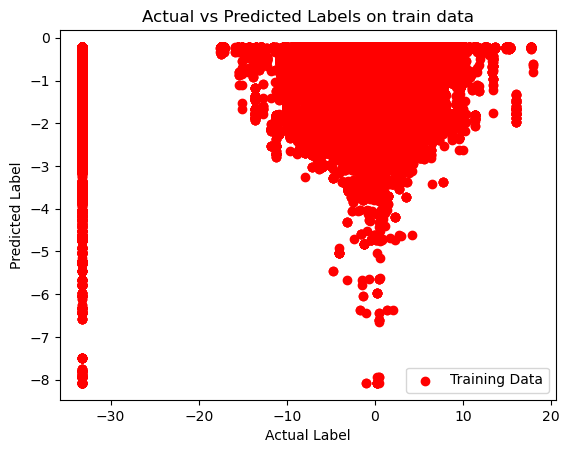

In [ ]:
# print actual and predicted labels on train data 
plt.scatter(y_train, y_train_pred, color='red', label='Training Data')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Actual vs Predicted Labels on train data')
plt.legend()
plt.show()

Text(0.5, 0, 'Actual Label')

Text(0, 0.5, 'Predicted Label')

Text(0.5, 1.0, 'Actual vs Predicted Labels on test data')

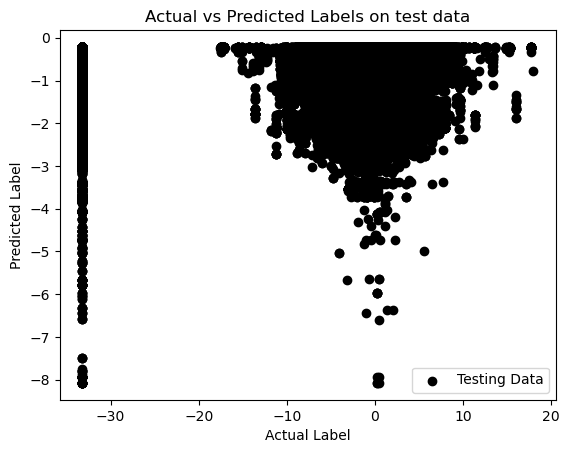

In [ ]:
# print actual and predicted labels on test data
plt.scatter(y_test, y_test_pred, color='black', label='Testing Data')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Actual vs Predicted Labels on test data')
plt.legend()
plt.show()

In [ ]:
#select linearregression model and fit the model on the data 
model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

#mke a prediction on test and train 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# print the metrics
print('Training MAE:', train_mae)
print('Testing MAE:', test_mae)
print('Training MSE:', train_mse)
print('Testing MSE:', test_mse)
print('Training RMSE:', train_rmse)
print('Testing RMSE:', test_rmse)
print('Training R^2 Score:', train_r2)
print('Testing R^2 Score:', test_r2)

/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(n_estimators=50, random_state=42)

Training MAE: 1.322322512392772
Testing MAE: 1.3210411906516704
Training MSE: 11.009333312105522
Testing MSE: 10.951430380775237
Training RMSE: 3.318031541758686
Testing RMSE: 3.3092945442760513
Training R^2 Score: 0.03294058265708377
Testing R^2 Score: 0.032465905607024115


Text(0.5, 0, 'Actual Label')

Text(0, 0.5, 'Predicted Label')

Text(0.5, 1.0, 'Actual vs Predicted Labels on train data')

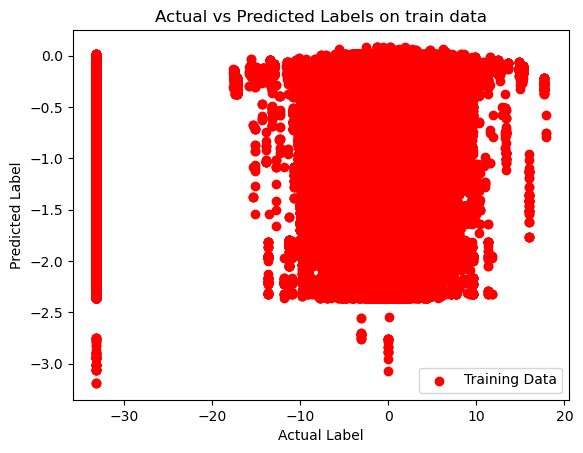

In [ ]:
# print actual and predicted labels on train data 
plt.scatter(y_train, y_train_pred, color='red', label='Training Data')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Actual vs Predicted Labels on train data')
plt.legend()
plt.show()

Text(0.5, 0, 'Actual Label')

Text(0, 0.5, 'Predicted Label')

Text(0.5, 1.0, 'Actual vs Predicted Labels on test data')

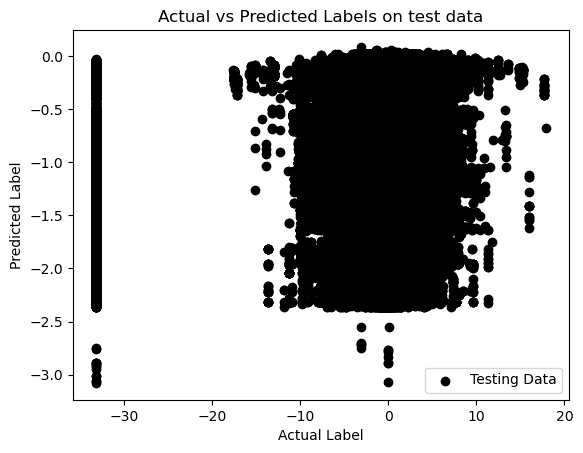

In [ ]:
# print actual and predicted labels on test data
plt.scatter(y_test, y_test_pred, color='black', label='Testing Data')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Actual vs Predicted Labels on test data')
plt.legend()
plt.show()

# Q7

considering the question_2 i dropped all the features which were containing multicollinearity and the below heat map explains that there is no multicollinearity exists.

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

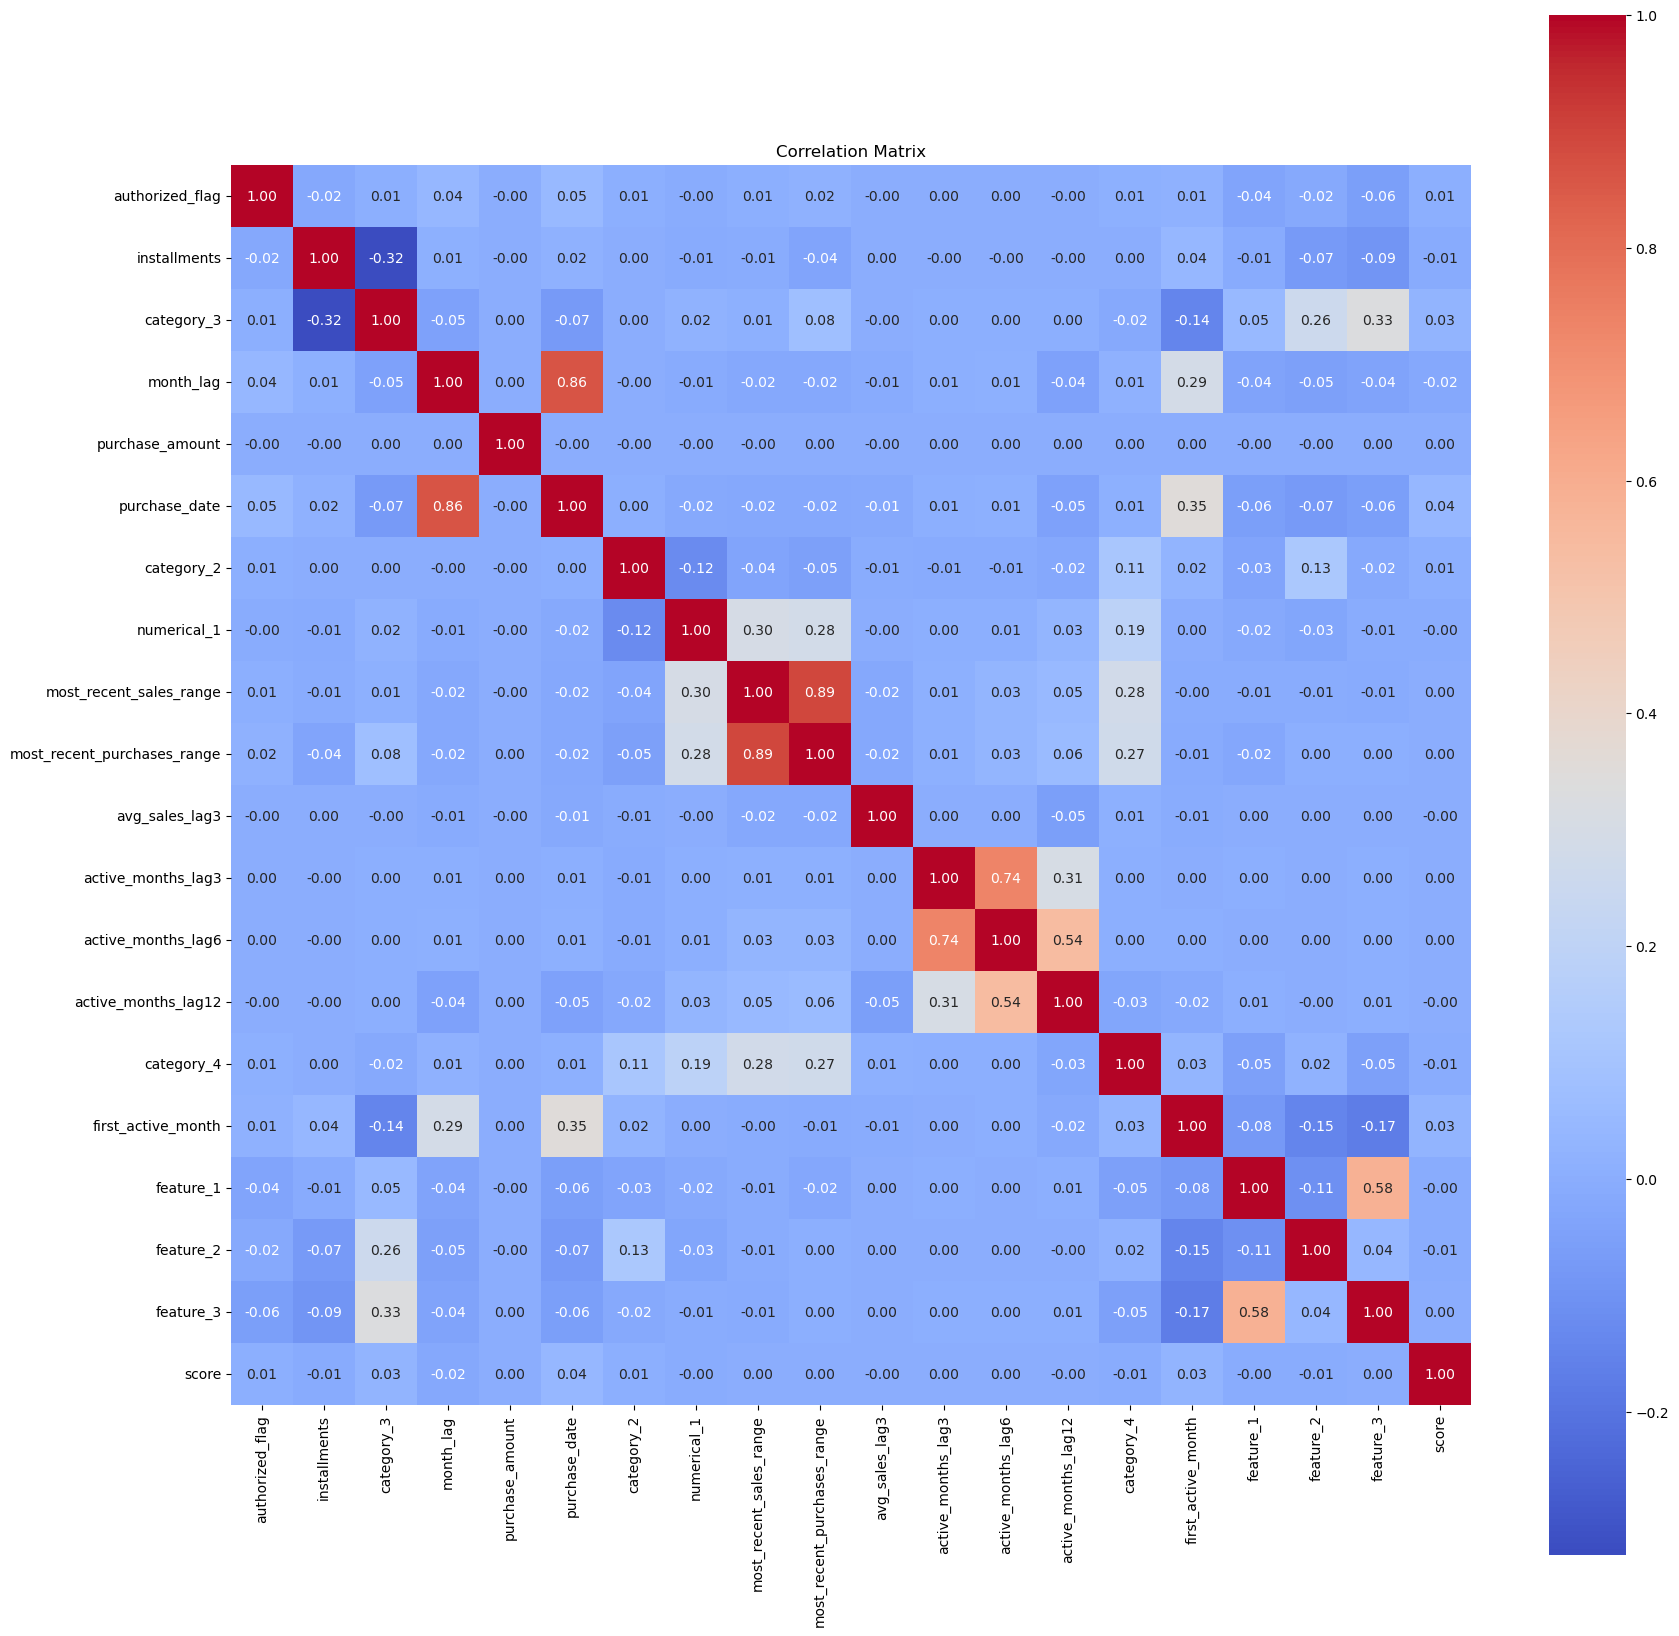

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()